### Applying KNN Modelling for the data with target as obtained labels from clustering

In [1]:
try:
    import os, sys
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report
    import matplotlib.pyplot as plt
    import seaborn as sns
except:
    print("Error because of",e)
data_path = os.getcwd()

In [2]:
model_df = pd.read_csv(data_path+"//standard_data.csv")
label_df = pd.read_csv(data_path+"//labels.csv")

In [3]:
labels = label_df.values

In [4]:
# splitting the data for training and testing
x_train,x_test,y_train,y_test = train_test_split(model_df,labels,test_size=0.2, random_state=22,
                                                stratify=labels)

In [5]:
# training the model by taking neighbours the root of 1216
# initializing the model with 35 neighbours
knn_model = KNeighborsClassifier(n_neighbors=35)
# training the model
knn_model.fit(x_train,y_train)
# predicting the values based on model
knn_pred = knn_model.predict(x_test)
# evaluation
print("Accuracy of model with 35 neighbours is:",knn_model.score(x_test,y_test))
print("Mean Square Error is:",mean_squared_error(y_test, knn_pred))
print("Mean Absolute Error is:",mean_absolute_error(y_test, knn_pred))
print("R2_Score is:", r2_score(y_test,knn_pred))

Accuracy of model with 35 neighbours is: 0.9156626506024096
Mean Square Error is: 0.3132530120481928
Mean Absolute Error is: 0.1606425702811245
R2_Score is: 0.5976049392947418


C:\Users\murth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [6]:
# evaluating the model through elbow method
error_rates = []
acc = []
mse = []
mae = []
r2s = []
for i in range(1, 15):
    # initializing the model with i neighbours
    print("For Neighbors =",str(i))
    knn_model = KNeighborsClassifier(n_neighbors=i)
    # training the model
    knn_model.fit(x_train,y_train)
    # predicting the values based on model
    knn_pred = knn_model.predict(x_test)
    # evaluation
    print("Accuracy of model with {} neighbours is:".format(i),knn_model.score(x_test,y_test))
    print("Mean Square Error is:",mean_squared_error(y_test, knn_pred))
    print("Mean Absolute Error is:",mean_absolute_error(y_test, knn_pred))
    print("R2_Score is:", r2_score(y_test,knn_pred))
    print(confusion_matrix(y_test, knn_pred))
    print(classification_report(y_test, knn_pred))
    error_rates.append(np.mean(knn_pred != y_test))
    acc.append(knn_model.score(x_test,y_test))
    mse.append(mean_squared_error(y_test, knn_pred))
    mae.append(mean_absolute_error(y_test, knn_pred))
    r2s.append(r2_score(y_test,knn_pred))
    print(75*"*")
print("Error rates obtained are", error_rates)
print("Accuracies are", acc)
print("Mean Square Errors are", mse)
print("Mean Absolute Errors are", mae)
print("R2 Scores are", r2s)

C:\Users\murth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\murth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


For Neighbors = 1
Accuracy of model with 1 neighbours is: 0.9156626506024096
Mean Square Error is: 0.27710843373493976
Mean Absolute Error is: 0.14859437751004015
R2_Score is: 0.644035138606887
[[100   0   6]
 [  2  49   3]
 [ 10   0  79]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       106
           1       1.00      0.91      0.95        54
           2       0.90      0.89      0.89        89

    accuracy                           0.92       249
   macro avg       0.93      0.91      0.92       249
weighted avg       0.92      0.92      0.92       249

***************************************************************************
For Neighbors = 2
Accuracy of model with 2 neighbours is: 0.9196787148594378
Mean Square Error is: 0.24899598393574296
Mean Absolute Error is: 0.13654618473895583
R2_Score is: 0.6801475158496665
[[106   0   0]
 [  4  50   0]
 [ 14   2  73]]
              precision    recall  f1-score   support

       

C:\Users\murth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\murth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\murth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[104   0   2]
 [  0  54   0]
 [ 13   0  76]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       106
           1       1.00      1.00      1.00        54
           2       0.97      0.85      0.91        89

    accuracy                           0.94       249
   macro avg       0.95      0.95      0.95       249
weighted avg       0.94      0.94      0.94       249

***************************************************************************
For Neighbors = 5
Accuracy of model with 5 neighbours is: 0.9397590361445783
Mean Square Error is: 0.24096385542168675
Mean Absolute Error is: 0.12048192771084337
R2_Score is: 0.6904653379190321
[[103   0   3]
 [  0  54   0]
 [ 12   0  77]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       106
           1       1.00      1.00      1.00        54
           2       0.96      0.87      0.91        89

    accuracy                          

C:\Users\murth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\murth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\murth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\murth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       106
           1       1.00      1.00      1.00        54
           2       0.94      0.88      0.91        89

    accuracy                           0.94       249
   macro avg       0.95      0.94      0.94       249
weighted avg       0.94      0.94      0.94       249

***************************************************************************
For Neighbors = 8
Accuracy of model with 8 neighbours is: 0.9317269076305221
Mean Square Error is: 0.26104417670682734
Mean Absolute Error is: 0.13253012048192772
R2_Score is: 0.6646707827456181
[[102   0   4]
 [  1  53   0]
 [ 12   0  77]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       106
           1       1.00      0.98      0.99        54
           2       0.95      0.87      0.91        89

    accuracy                           0.93       249
   macro avg       0.95      0

C:\Users\murth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\murth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\murth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Mean Square Error is: 0.2289156626506024
Mean Absolute Error is: 0.11646586345381527
R2_Score is: 0.7059420710230805
[[102   0   4]
 [  1  53   0]
 [ 10   0  79]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       106
           1       1.00      0.98      0.99        54
           2       0.95      0.89      0.92        89

    accuracy                           0.94       249
   macro avg       0.95      0.94      0.95       249
weighted avg       0.94      0.94      0.94       249

***************************************************************************
For Neighbors = 11
Accuracy of model with 11 neighbours is: 0.9397590361445783
Mean Square Error is: 0.24096385542168675
Mean Absolute Error is: 0.12048192771084337
R2_Score is: 0.6904653379190321
[[99  0  7]
 [ 0 54  0]
 [ 8  0 81]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       106
           1       1.00      1.00    

C:\Users\murth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of model with 13 neighbours is: 0.9357429718875502
Mean Square Error is: 0.2570281124497992
Mean Absolute Error is: 0.1285140562248996
R2_Score is: 0.6698296937803009
[[99  0  7]
 [ 0 54  0]
 [ 9  0 80]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       106
           1       1.00      1.00      1.00        54
           2       0.92      0.90      0.91        89

    accuracy                           0.94       249
   macro avg       0.95      0.94      0.94       249
weighted avg       0.94      0.94      0.94       249

***************************************************************************
For Neighbors = 14
Accuracy of model with 14 neighbours is: 0.927710843373494
Mean Square Error is: 0.27710843373493976
Mean Absolute Error is: 0.14056224899598393
R2_Score is: 0.644035138606887
[[101   0   5]
 [  1  53   0]
 [ 12   0  77]]
              precision    recall  f1-score   support

           0       0.89      0.95 

C:\Users\murth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


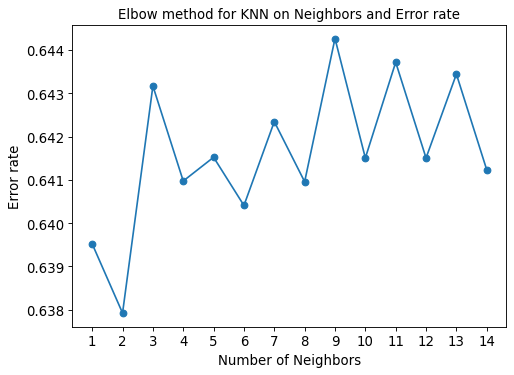

In [7]:
# plot
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(range(1, 15), error_rates, marker='o')
plt.xlabel('Number of Neighbors',fontsize=12)
plt.ylabel('Error rate',fontsize=12)
plt.title("Elbow method for KNN on Neighbors and Error rate",fontsize=12)
plt.xticks(list(range(1,15)),fontsize=12)
plt.yticks(fontsize=12)
plt.show()

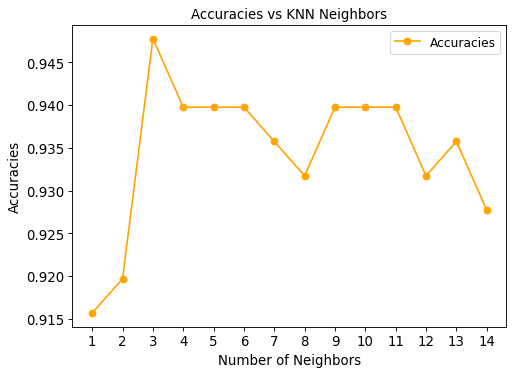

In [8]:
# plot of Acc vs KNN Neighbors
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(range(1, 15), acc, marker='o',color='orange',label='Accuracies')
plt.xlabel('Number of Neighbors',fontsize=12)
plt.ylabel('Accuracies',fontsize=12)
plt.title("Accuracies vs KNN Neighbors",fontsize=12)
plt.xticks(list(range(1,15)),fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor =(1, 1),fontsize=11)
plt.show()

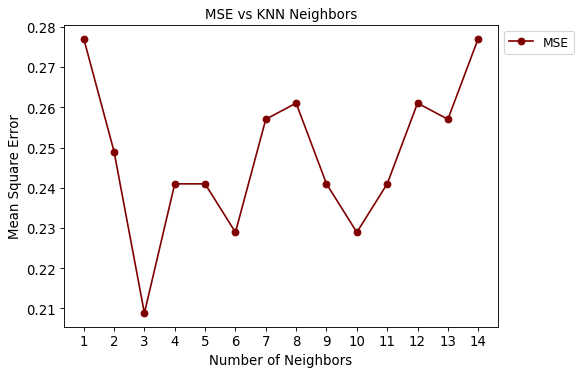

In [9]:
# plot of MSE vs KNN Neighbors
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(range(1, 15), mse, marker='o',color='maroon',label='MSE')
plt.xlabel('Number of Neighbors',fontsize=12)
plt.ylabel('Mean Square Error',fontsize=12)
plt.title("MSE vs KNN Neighbors",fontsize=12)
plt.xticks(list(range(1,15)),fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor =(1, 1),fontsize=11)
plt.show()

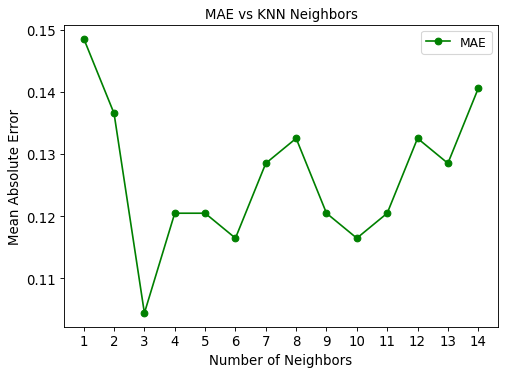

In [10]:
# plot of MAE vs KNN Neighbors
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(range(1, 15), mae, marker='o',color='green',label='MAE')
plt.xlabel('Number of Neighbors',fontsize=12)
plt.ylabel('Mean Absolute Error',fontsize=12)
plt.title("MAE vs KNN Neighbors",fontsize=12)
plt.xticks(list(range(1,15)),fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor =(1, 1),fontsize=11)
plt.show()

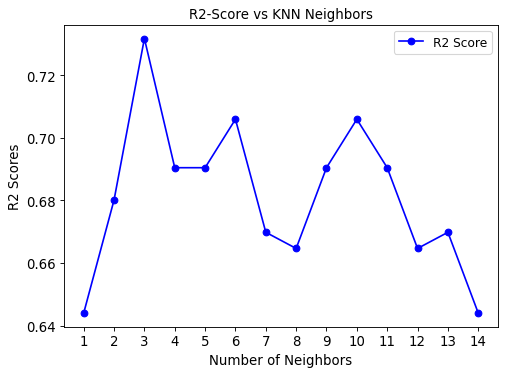

In [11]:
# plot of R2Score vs KNN Neighbors
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(range(1, 15), r2s, marker='o',color='blue',label='R2 Score')
plt.xlabel('Number of Neighbors',fontsize=12)
plt.ylabel('R2 Scores',fontsize=12)
plt.title("R2-Score vs KNN Neighbors",fontsize=12)
plt.xticks(list(range(1,15)),fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor =(1, 1),fontsize=11)
plt.show()

In [12]:
### Cross validation on the data

In [13]:
#### K-Fold CV, Leave One Out CV, Repeated Random Test-Train Splits

In [14]:
x_fold = model_df
y_fold = labels

In [15]:
# K-Fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
Mean_Acc_Kfold = []
for i in range(1,15):
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    print("Neighbours :",i)
    knn_model = KNeighborsClassifier(n_neighbors=i)
    results = cross_val_score(knn_model, x_fold, y_fold.ravel(), cv=kfold)
    print("Accuracies for K-Fold:", results)
    print("Mean Accuracy of K-Fold:", results.mean()*100.0)
    Mean_Acc_Kfold.append(results.mean()*100.0)
    print(50*"=*")
print(Mean_Acc_Kfold)

Neighbours : 1
Accuracies for K-Fold: [0.896      0.896      0.904      0.928      0.92       0.91129032
 0.90322581 0.91129032 0.9516129  0.92741935]
Mean Accuracy of K-Fold: 91.48838709677418
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Neighbours : 2
Accuracies for K-Fold: [0.92       0.928      0.896      0.928      0.936      0.95967742
 0.91129032 0.91935484 0.93548387 0.94354839]
Mean Accuracy of K-Fold: 92.77354838709677
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Neighbours : 3
Accuracies for K-Fold: [0.952      0.976      0.952      0.936      0.976      0.92741935
 0.9516129  0.94354839 0.94354839 0.97580645]
Mean Accuracy of K-Fold: 95.33935483870968
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Neighbours : 4
Accuracies for K-Fold: [0.968      0.976      0.944      0.936      0.952      0.95967742
 0.9354838

In [16]:
# Leave One Out CV
from sklearn.model_selection import LeaveOneOut
loo_cv = LeaveOneOut()
Mean_Acc_loo_cv = []
for i in range(1,15):
    print("Neighbours :",i)
    knn_model = KNeighborsClassifier(n_neighbors=i)
    results = cross_val_score(knn_model, x_fold, y_fold.ravel(), cv=loo_cv)
    print("Accuracies for Leave One Out -Fold:", results)
    print("Mean Accuracy of Leave One Out -Fold:", results.mean()*100.0)
    Mean_Acc_loo_cv.append(results.mean()*100.0)
    print(50*"*=")
print(Mean_Acc_loo_cv)

Neighbours : 1
Accuracies for Leave One Out -Fold: [1. 1. 0. ... 1. 1. 1.]
Mean Accuracy of Leave One Out -Fold: 91.64658634538154
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
Neighbours : 2
Accuracies for Leave One Out -Fold: [1. 1. 0. ... 1. 1. 1.]
Mean Accuracy of Leave One Out -Fold: 92.93172690763052
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
Neighbours : 3
Accuracies for Leave One Out -Fold: [1. 1. 1. ... 1. 1. 1.]
Mean Accuracy of Leave One Out -Fold: 95.90361445783132
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
Neighbours : 4
Accuracies for Leave One Out -Fold: [1. 1. 1. ... 1. 1. 1.]
Mean Accuracy of Leave One Out -Fold: 95.34136546184739
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
Neighbours : 5
Accuracies for Leave One Out -Fold: [1. 1. 1. ... 1. 1. 1

In [17]:
# Random shuffle test train splits
from sklearn.model_selection import ShuffleSplit
Mean_Acc_rs_cv = []
for i in range(1,15):
    print("Neighbours :",i)
    rs_fold = ShuffleSplit(n_splits=10, test_size=0.25, random_state=7)
    knn_model = KNeighborsClassifier(n_neighbors=i)
    results = cross_val_score(knn_model, x_fold, y_fold.ravel(), cv=rs_fold)
    print("Accuracies for Random shuffle test train splits:", results)
    print("Mean Accuracy of Random shuffle test train splits:", results.mean()*100.0)
    Mean_Acc_rs_cv.append(results.mean()*100.0)
    print(50*"*=")
print(Mean_Acc_rs_cv)

Neighbours : 1
Accuracies for Random shuffle test train splits: [0.89423077 0.90705128 0.92307692 0.92948718 0.93269231 0.91987179
 0.92628205 0.91346154 0.91666667 0.94230769]
Mean Accuracy of Random shuffle test train splits: 92.05128205128204
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
Neighbours : 2
Accuracies for Random shuffle test train splits: [0.93269231 0.91987179 0.91666667 0.94230769 0.95192308 0.91987179
 0.92948718 0.92628205 0.91346154 0.94230769]
Mean Accuracy of Random shuffle test train splits: 92.94871794871794
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
Neighbours : 3
Accuracies for Random shuffle test train splits: [0.95833333 0.95512821 0.95833333 0.95192308 0.95512821 0.97435897
 0.95192308 0.93589744 0.94551282 0.95512821]
Mean Accuracy of Random shuffle test train splits: 95.41666666666666
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

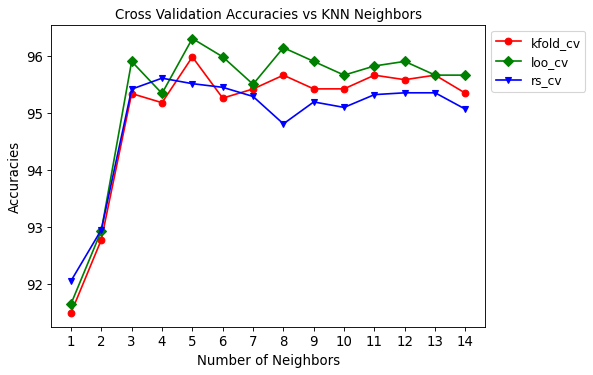

In [18]:
# plot
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(range(1, 15), Mean_Acc_Kfold, marker='o',color='red',label='kfold_cv')
plt.plot(range(1, 15), Mean_Acc_loo_cv, marker='D',color='green',label='loo_cv')
plt.plot(range(1, 15), Mean_Acc_rs_cv, marker='v',color='blue',label='rs_cv')
plt.xlabel('Number of Neighbors',fontsize=12)
plt.ylabel('Accuracies',fontsize=12)
plt.title("Cross Validation Accuracies vs KNN Neighbors",fontsize=12)
plt.xticks(list(range(1,15)),fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor =(1, 1),fontsize=11)
plt.show()